# Ex. 2
Please fill-in your ID in the following cell, *No Names!*

Then fill your names in the next two cells.

In [1]:
id1 = "205560782"
id2 = "315810176"


name_student_1 = "Inbar, Tzur"
name_student_1 = "Ronen, Kurman"

import pandas as pd
import numpy as np
import seaborn as sns
df = pd.DataFrame([id1,id2])

# Uncomment in case two students are doing the assignment together
# df = pd.DataFrame([id1])df = pd.DataFrame([id1])
df.to_clipboard(index=False,header=False)

Intro - Opening the vaccination DataFrame and selecting the country Denmark.

In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
Denmark = vacc_df.loc[(vacc_df.location == 'Denmark')]

q1: Our country selection is "denmark", Showing the first three rows.

In [3]:
Denmark[0:3]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3956,Denmark,DNK,2020-12-27,6355.0,6355.0,NaN,NaN,NaN,0.11,0.11,NaN,NaN
3957,Denmark,DNK,2020-12-28,8367.0,8367.0,NaN,2012.0,2012.0,0.14,0.14,NaN,347.0
3958,Denmark,DNK,2020-12-29,17153.0,17153.0,NaN,8786.0,5399.0,0.30,0.30,NaN,932.0


q2: Which column has the maximum number of missing values(NaN)? 
    How many missing values are there in that column

In [8]:
max_nan_col = Denmark.columns[Denmark.isna().sum() == Denmark.isna().sum().max()]
max_value = str(Denmark.isna().sum().max())
max_nan_col

Index(['people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'], dtype='object')

q3: Show the rows holding no values for the column daily_vaccinations.

In [7]:
Denmark.loc[Denmark['daily_vaccinations'].isna()]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
2760,Denmark,DNK,2020-12-27,6400.0,6400.0,NaN,NaN,NaN,0.11,0.11,NaN,NaN


q4: Fill missing values of the column daily_vaccinations, explain the method you used and why you think its the best method.
הסבר - בחרנו בדרך הישירה למרות שקופצת אזהרה שלא רלוונטית אלינו, בנוסף ביטלנו את האזהרה ע"מ שלא תרתיע משתמשים.
אני חושב שזו הדרך הטובה והיעילה ביותר כי היא ישירה ופשוטה ומבטלת את האזהרה המיותרת של פנדס להמשך העבודה על הקובץ.
החלפנו ערכים חסרים באפס בגלל שזה הגיוני.

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'
Denmark['daily_vaccinations'] = Denmark['daily_vaccinations'].fillna(0)

q5: create histogram for the cloumns total_vaccinations and people_vaccinated.

<AxesSubplot:ylabel='Frequency'>

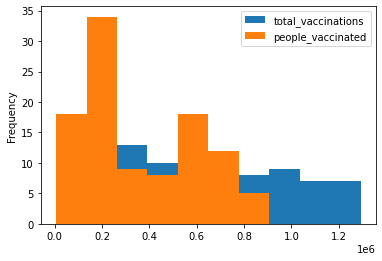

In [9]:
total_vaccinations = Denmark['total_vaccinations']
people_vaccinated = Denmark['people_vaccinated']
Denmark_histogram = pd.DataFrame({'total_vaccinations': total_vaccinations, 'people_vaccinated': people_vaccinated})
Denmark_histogram.plot.hist()

q6: Create a boxplot for the column people_fully_vaccinated_per_hundred.
מסקנה: הקו הירוק מסמן את החציון של הבוקספלוט.

Median is 2.895
Mean is 2.6145
Mode is 0.0
Standart deviation is 2.218822829790608


<AxesSubplot:>

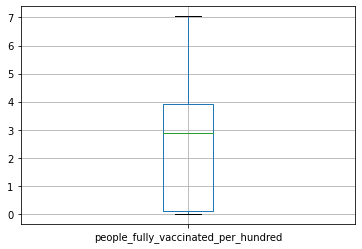

In [143]:
import statistics
Denmark['people_fully_vaccinated_per_hundred'] = Denmark['people_fully_vaccinated_per_hundred'].fillna(0)
boxplot = Denmark.boxplot(column=['people_fully_vaccinated_per_hundred'])
print("Median is "+str(Denmark['people_fully_vaccinated_per_hundred'].median()))
print("Mean is "+str(Denmark['people_fully_vaccinated_per_hundred'].mean()))
print("Mode is "+str(statistics.mode(Denmark['people_fully_vaccinated_per_hundred'])))
print("Standart deviation is "+str(np.std(Denmark['people_fully_vaccinated_per_hundred'])))
boxplot

q7: Add a row 'month' and show the columns daily_vaccinations and people_vaccinated_per_hundred (nX3 matrix).

In [10]:
Denmark['month'] = pd.DatetimeIndex(Denmark['date']).month
df = Denmark.groupby('month')[['daily_vaccinations']].max()
df['people_vaccinated_per_hundred'] = Denmark.groupby('month')[['people_vaccinated_per_hundred']].max()
df

,daily_vaccinations,people_vaccinated_per_hundred
month,,
1,10797.0,3.19
2,17294.0,7.41
3,18918.0,12.84
4,19259.0,14.70
12,7392.0,0.60


q8: Sort the results from q7, if they are already sorted, show how to sort them.

In [160]:
df.sort_values('people_vaccinated_per_hundred')

,daily_vaccinations,people_vaccinated_per_hundred
month,,
12.0,NaN,0.60
1.0,10818.0,3.20
2.0,17293.0,7.41
3.0,18894.0,12.85
4.0,18105.0,13.42
